<a href="https://colab.research.google.com/github/saigirija34/Data-structures/blob/main/unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

In [3]:
uploaded=files.upload()

Saving Unemployment_in_India[1].csv to Unemployment_in_India[1].csv


In [4]:
#importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar

import datetime as dt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [7]:
df = pd.read_csv('Unemployment_in_India[1].csv')

In [8]:
#displaying the dataframe
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [9]:
#displaying the shape
df.shape

(768, 7)

In [10]:
#267 rows, 9 columns

In [11]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [12]:
#checking for null values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [13]:
#no null values, so need to handle them

In [18]:
#changing column names so that they dont have white-spaces, numbers or any special-characters
df.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Area']


In [19]:
#displaying the updated dataframe
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural


In [20]:
#converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [21]:
#converting the 'Frequency' column to categorical data type
df['Frequency']= df['Frequency'].astype('category')

In [22]:
#extracting the 'Month' from the Date
df['Month'] =  df['Date'].dt.month

In [25]:
df['Area'] = df['Area'].astype('category')

In [26]:
#dropping the Month column as it in irrelevant now
#we have extracted the monthNumbers and monthNames individually
df.drop(columns='Month',inplace=True)
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural


In [27]:
#5-number summary
df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [28]:
#5-number summary of the numerical variables which give some information
round(df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].describe().T,2)

#rounded to 2 decimal points and transposed to get a horizontal version

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,740.0,11.79,10.72,0.00,4.66,8.35,15.89,76.74
Estimated Employed,740.0,7204460.03,8087988.43,49420.00,1190404.50,4744178.50,11275489.50,45777509.00
Estimated Labour Participation Rate,740.0,42.63,8.11,13.33,38.06,41.16,45.50,72.57


In [30]:
#grouping by 'Region' and finding mean values for the numerical columns
regionStats = df.groupby(['Area'])[['Estimated Unemployment Rate',
                                      'Estimated Employed',
                                      'Estimated Labour Participation Rate']].mean().reset_index()

#rounding the values to 2 decimal points
round(regionStats,2)

,Area,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,Rural,10.32,10192852.57,44.46
1,Urban,13.17,4388625.58,40.90


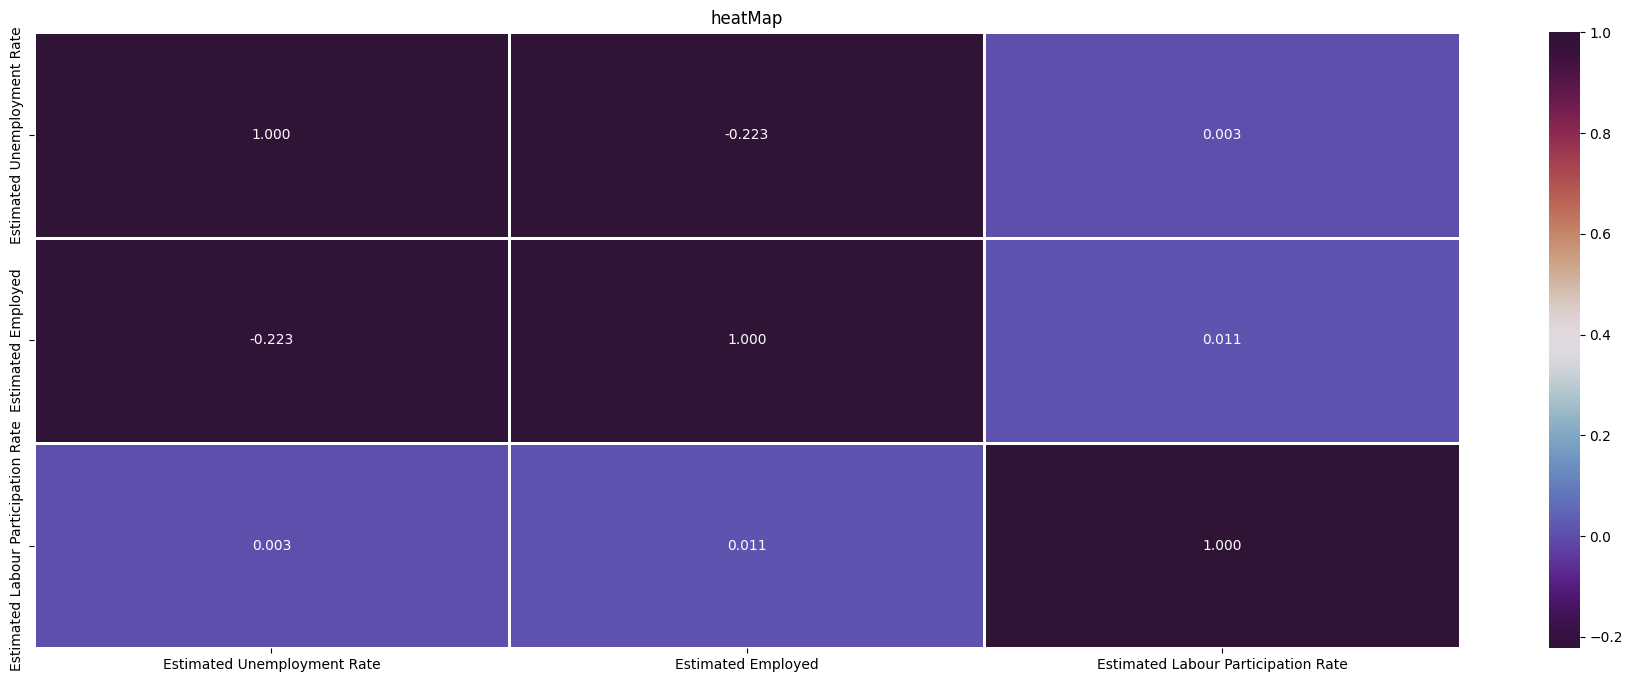

In [32]:
#constructing a 'heatMap' to find the 'pair-wise correlation' values

#dataframe of all the numerical columns
heatMap = df[['Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate']]

#constructing on heatMap with correlation values
heatMap = heatMap.corr()

#plotting the figure
plt.figure(figsize=(23,8))
sns.heatmap(heatMap, annot=True,cmap='twilight_shifted', fmt='.3f', linewidths=1)
plt.title('heatMap')
plt.show()

In [33]:
#plotting a box-plot to show un-employment rate in each state
fig = px.box(
    df,
    x='States',
    y='Estimated Unemployment Rate',
    color='States',
    title='unemploymentRate',
    template='plotly'
)
fig.show()

In [35]:
#creating a scatter matrix plot to denote relationship
fig = px.scatter_matrix(df,dimensions=['Estimated Unemployment Rate','Estimated Employed',
                'Estimated Labour Participation Rate'],
    color='Area')
fig.show()

In [36]:
#plotting a "Bar-plot" to find the "average unemployment rate in each state"
newDF = df[['Estimated Unemployment Rate','States']]

#grouping the dataframe by 'States' and finding the corresponding 'mean'
newDF = newDF.groupby('States').mean().reset_index()

#sorting the values in the dataframe
newDF = newDF.sort_values('Estimated Unemployment Rate')

fig = px.bar(newDF,
             x='States',
             y='Estimated Unemployment Rate',
             color='States',
             title='State-wise Average Employment Rate')
fig.show()

In [43]:
#defining a function to sort the values based on impact
#from the above 'box-plot', the values are ranging between 0 and 40

def sort_impact(x):
    if x <= 10:
        #impactedState
        return '🥲'

    elif x <= 20:
        #hardImpactedState
        return '🥲😥'

    elif x <= 30:
        #harderImpactedState
        return '🥲😥😖'

    elif x <= 40:
        #hardestImpactedState
        return '🥲😥😖🤯'

    return x